In [1]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [2]:
# Function to download and process stock data
def process_stock_data(ticker, start_date, end_date):
    
    """
    Downloads and processes stock data from Yahoo Finance.
    
    Parameters:
    ticker (str): Stock ticker symbol.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    
    Returns:
    pandas.Series: Series of closing prices.
    """
    
    data = yf.download(ticker, start=start_date, end=end_date)
    closing_prices = data['Close']
    return closing_prices

In [3]:
# Function to fit and predict using ARIMA
def arima_model(closing_prices):
    
    """
    Fits an ARIMA model to the closing prices and makes predictions.
    
    Parameters:
    closing_prices (pandas.Series): Series of closing prices.
    
    Returns:
    pandas.Series: Predicted values.
    """
    
    model = ARIMA(closing_prices, order=(5,1,0))
    model_fit = model.fit()
    predictions = model_fit.predict(typ='levels')
    return predictions

In [4]:
# Function to plot the data
def plot_data(actual, predicted, title):
    
    """
    Plots actual vs predicted stock prices.
    
    Parameters:
    actual (pandas.Series): Actual closing prices.
    predicted (pandas.Series): Predicted closing prices.
    title (str): Title of the plot.
    """
    
    plt.figure(figsize=(10,4))
    plt.plot(actual, label='Original')
    plt.plot(predicted, color='red', label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
# Function to compute MAPE
def compute_mape(actual, predicted):
    
    """
    Computes the Mean Absolute Percentage Error (MAPE).
    
    Parameters:
    actual (pandas.Series): Actual values.
    predicted (pandas.Series): Predicted values.
    
    Returns:
    float: MAPE value.
    """
    
    mape = mean_absolute_error(actual, predicted)/len(actual) * 100
    return round(mape, 2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/Users/gurkirankaur/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gurkirankaur/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gurkirankaur/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gurkirankaur/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency in

MAPE for Apple: 0.15%
MAPE for Tesla: 0.42%


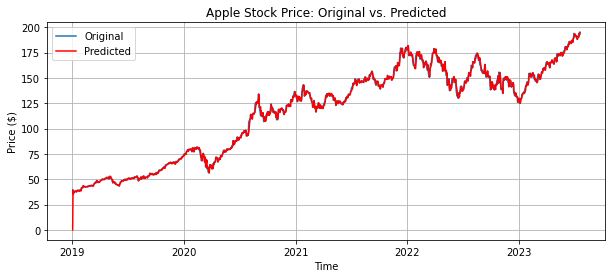

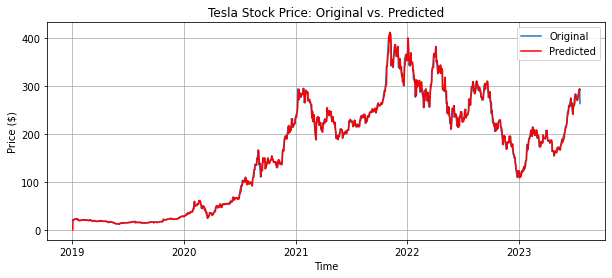

In [6]:
# Start and end dates
start_date='2019-01-01'
end_date='2023-07-21'

# Process stock data
closing_prices_apple = process_stock_data('AAPL', start_date, end_date)
closing_prices_tesla = process_stock_data('TSLA', start_date, end_date)

# Fit ARIMA and make predictions
predictions_apple = arima_model(closing_prices_apple)
predictions_tesla = arima_model(closing_prices_tesla)

# Compute MAPE
mape_apple = compute_mape(closing_prices_apple, predictions_apple)
mape_tesla = compute_mape(closing_prices_tesla, predictions_tesla)

# Print MAPE
print(f"MAPE for Apple: {mape_apple}%")
print(f"MAPE for Tesla: {mape_tesla}%")

# Plot the data
plot_data(closing_prices_apple, predictions_apple, 'Apple Stock Price: Original vs. Predicted')
plot_data(closing_prices_tesla, predictions_tesla, 'Tesla Stock Price: Original vs. Predicted')